In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [45]:
data = pd.read_csv("ice_cream.csv")
data.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [46]:
data = data.rename(columns={"DATE":"date","IPN31152N":"production"},)

In [47]:
data["date"] = pd.to_datetime(data["date"])

In [48]:
data.isnull().sum()

date          0
production    0
dtype: int64

In [49]:
data.columns

Index(['date', 'production'], dtype='object')

In [50]:
data.dtypes

date          datetime64[ns]
production           float64
dtype: object

In [51]:
data.set_index("date",inplace=True)

In [52]:
data.index

DatetimeIndex(['1972-01-01', '1972-02-01', '1972-03-01', '1972-04-01',
               '1972-05-01', '1972-06-01', '1972-07-01', '1972-08-01',
               '1972-09-01', '1972-10-01',
               ...
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', name='date', length=577, freq=None)

In [53]:
start_date = pd.to_datetime("2010-01-01")
df = data[start_date:]

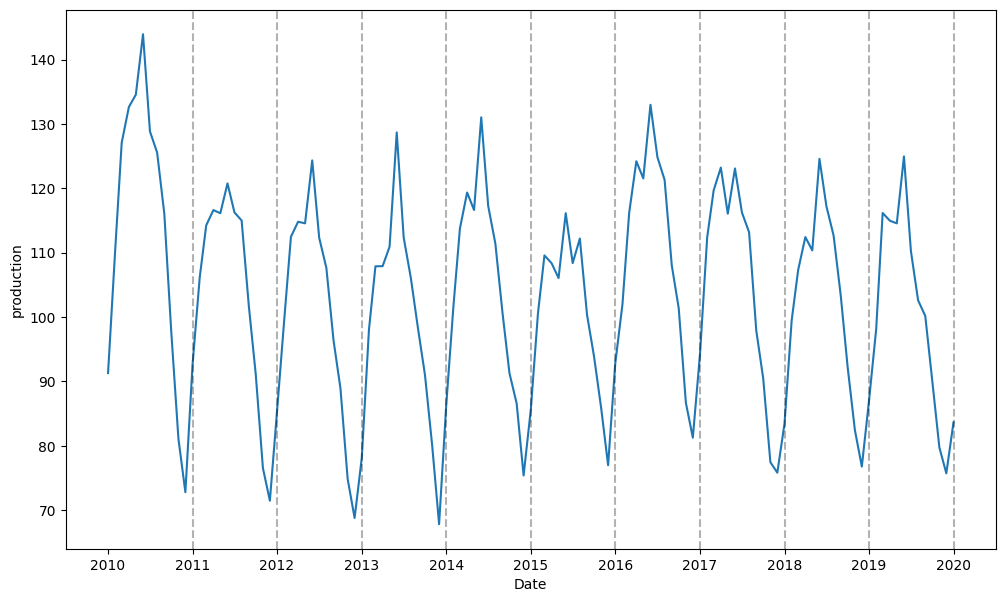

In [54]:
plt.figure(figsize=(12,7))
plt.plot(df)
plt.xlabel("Date")
plt.ylabel("production")
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k',linestyle='--',alpha=0.3)
plt.show()

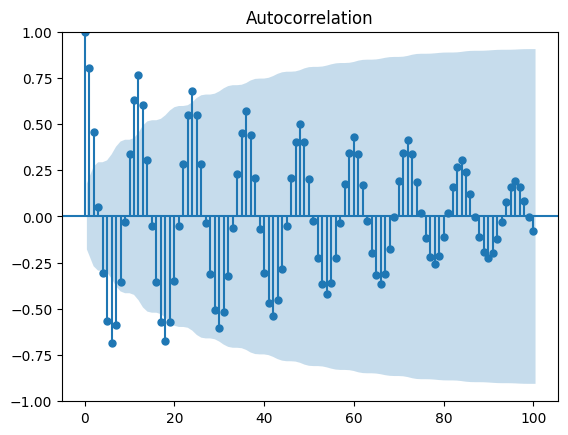

In [55]:
acf = plot_acf(df.production,lags=100)

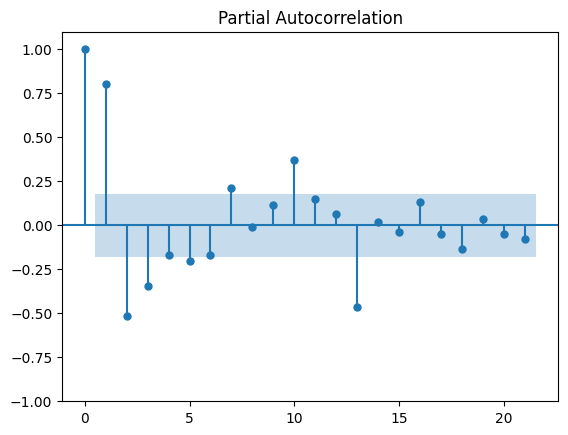

In [56]:
pacf = plot_pacf(df.production)
plt.ylim(-1,1.1)
plt.show()